<a href="https://colab.research.google.com/github/TanThinNguyen/aivietnam-course/blob/master/Tuan8/Tuan8_Bai5_Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize
x_train = x_train/255.0
x_test = x_test/255.0
m_train = x_train.shape[0]  # num of datapoints

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)    # (60000, 28, 28)
print(y_train.shape)    # (60000,)

(60000, 28, 28)
(60000,)


In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

Xây dựng mô hình dùng **Softmax Classifier**

In [ ]:
# model construction
model = Sequential([
    Flatten(input_shape=(28, 28)),  # duối ma trận 28x28 thành vector
    Dense(units=10, activation="softmax")
])

# complie and train
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, verbose=1)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5119 - accuracy: 0.8697 - val_loss: 0.3159 - val_accuracy: 0.9137
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3180 - accuracy: 0.9113 - val_loss: 0.2951 - val_accuracy: 0.9163
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2936 - accuracy: 0.9176 - val_loss: 0.2728 - val_accuracy: 0.9266
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2811 - accuracy: 0.9216 - val_loss: 0.2692 - val_accuracy: 0.9258
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2736 - accuracy: 0.9241 - val_loss: 0.2656 - val_accuracy: 0.9275
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9244 - val_loss: 0.2692 - val_accuracy: 0.9265
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2641 - accuracy: 0.9266 - val_loss: 0.2637 - val_accuracy:

In [ ]:
history.history

In [ ]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

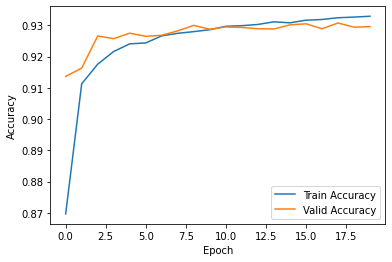

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(history.epoch, history.history["accuracy"], label="Train Accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid Accuracy")

plt.legend()
plt.show()

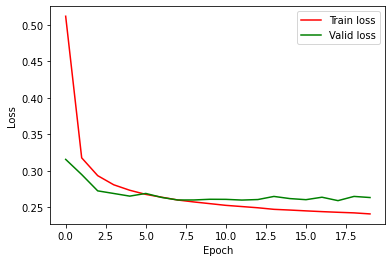

In [ ]:
plt.figure()

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.plot(history.epoch, history.history["loss"], label="Train loss", color="r")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss", color="g")

plt.legend()
plt.show()

Xây dựng mô hình dùng **MLP**

In [ ]:
# model construction
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=64, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=10, activation="softmax")
])

# compile
model1.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train
history = model1.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3105 - accuracy: 0.9119 - val_loss: 0.1660 - val_accuracy: 0.9497
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1358 - accuracy: 0.9592 - val_loss: 0.1198 - val_accuracy: 0.9655
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0984 - accuracy: 0.9703 - val_loss: 0.1302 - val_accuracy: 0.9615
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0781 - accuracy: 0.9761 - val_loss: 0.1038 - val_accuracy: 0.9683
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0624 - accuracy: 0.9812 - val_loss: 0.1031 - val_accuracy: 0.9682
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.1143 - val_accuracy: 0.9678
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.1006 - val_accuracy:

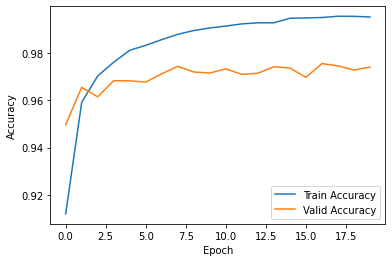

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(history.epoch, history.history["accuracy"], label="Train Accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid Accuracy")

plt.legend()
plt.show()

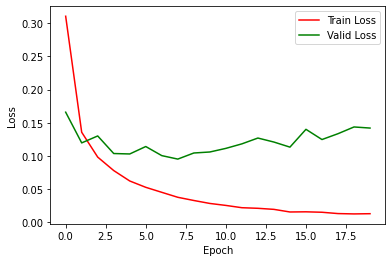

In [ ]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.plot(history.epoch, history.history["loss"], label="Train Loss", color="r")
plt.plot(history.epoch, history.history["val_loss"], label="Valid Loss", color="g")

plt.legend()
plt.show()